In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('project1.csv')

/tmp/ipykernel_17239/101105466.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print("Shape/Size of the dataset: " + str(data.shape))

Shape/Size of the dataset: (398, 9)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
# changing missing value(s) to NaN
data.replace("?", np.NAN, inplace=True)

In [6]:
# horsepower seems like it should be an float instead of an object (was likely an object due to NaNs, so we can convert that column:
data['horsepower'] = data['horsepower'].astype("float")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [8]:
# seems like there are 6 null horsepower values, we can take a look at the specific rows
data.loc[data['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [9]:
# to fill these values with an informed guess, we can grab the horsepower statistics
# grouped by cylinders (assuming cylinders and horsepower are correlated)
data.groupby(['cylinders'])['horsepower'].describe()
# generally, we see that more cylinders = more horsepower

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.0,99.250000,8.301606,90.0,95.25,98.5,102.5,110.0
4,199.0,78.281407,14.523099,46.0,68.00,78.0,88.0,115.0
5,3.0,82.333333,18.583146,67.0,72.00,77.0,90.0,103.0
6,83.0,101.506024,14.310472,72.0,92.50,100.0,110.0,165.0
8,103.0,158.300971,28.453552,90.0,140.00,150.0,175.0,230.0


In [10]:
# we can now fill in the null horsepower values with the average horsepower of the
# rows with the same number of cylinders:
hp_avgs = data.groupby(['cylinders'])['horsepower'].mean()
data.loc[data['horsepower'].isnull(),['horsepower']] = hp_avgs[data[data['horsepower'].isnull()]["cylinders"]].reset_index(drop=True).set_axis(data[data['horsepower'].isnull()]["cylinders"].index)
data.loc[[32,126,330,336,354,374]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,78.281407,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,101.506024,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,78.281407,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,78.281407,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,78.281407,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,78.281407,3035,20.5,82,1,amc concord dl


In [11]:
# the origin column also looks like it could be categorical, we can check the potential
# values to be sure
data.groupby(['origin'])['origin'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
1,249.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,70.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,79.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0


In [12]:
# let's convert this to categorical data (and perform one-hot encoding) since it
# doesn't seem like there's a reason to keep it numeric
data['origin'] = data['origin'].astype("category")
data = pd.get_dummies(data, columns=['origin'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
 8   origin_2      398 non-null    bool   
 9   origin_3      398 non-null    bool   
dtypes: bool(2), float64(4), int64(3), object(1)
memory usage: 25.8+ KB


In [13]:
data.duplicated().sum() # no duplicate rows

0

<Axes: xlabel='car_name', ylabel='Count'>

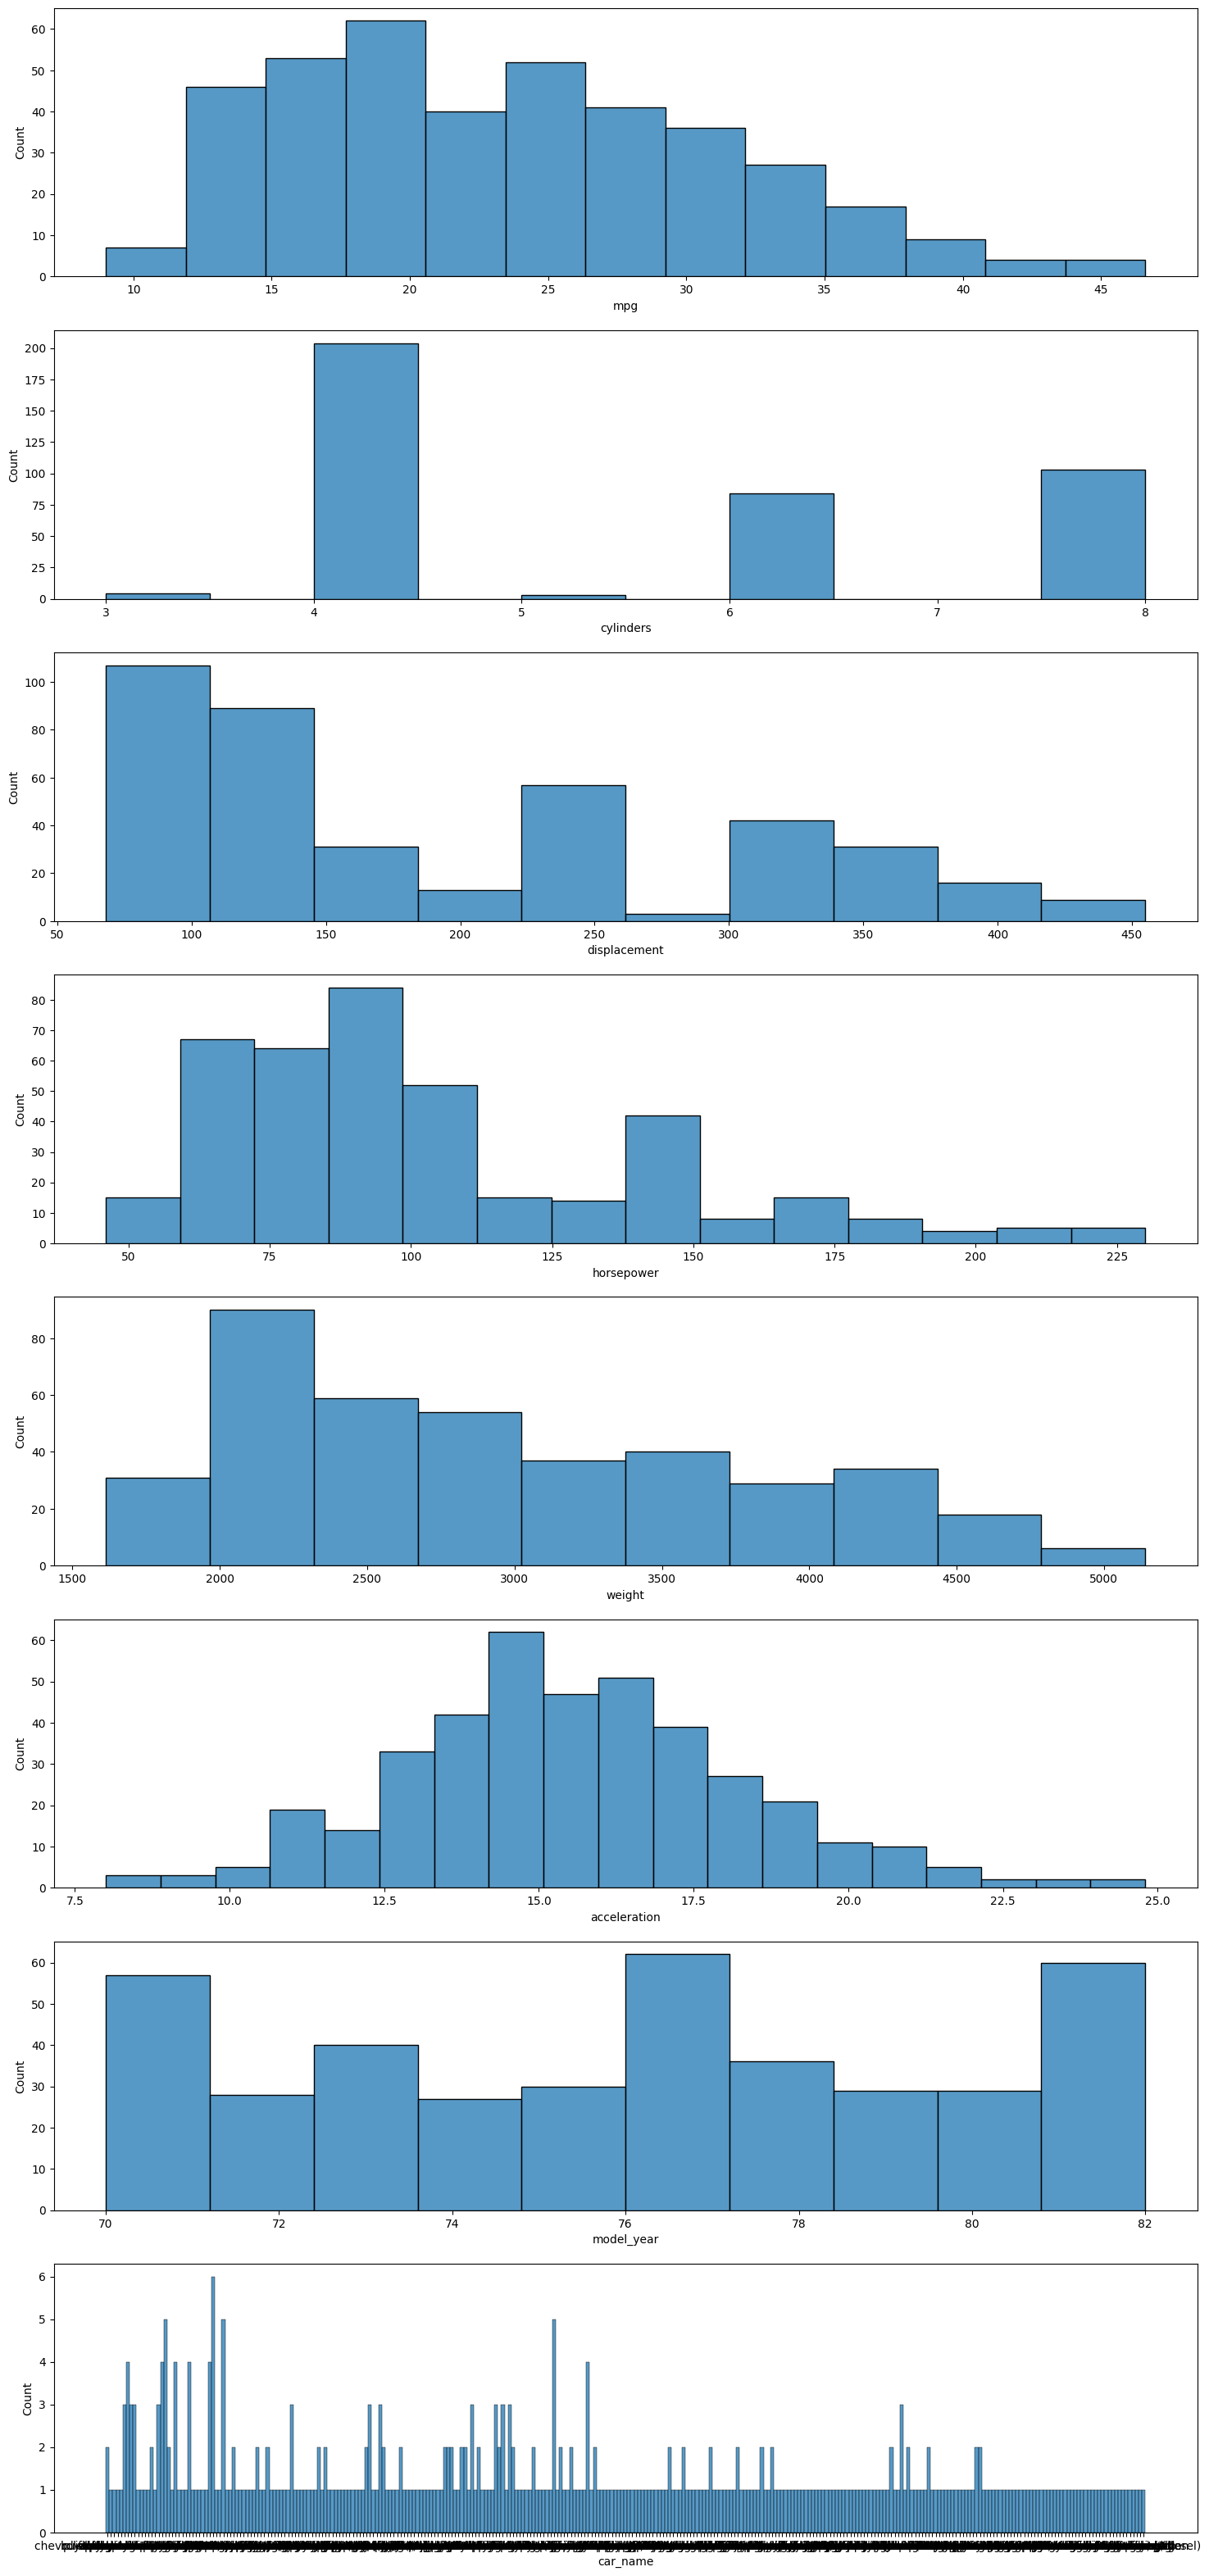

In [14]:
fig, axes = plt.subplots(8, 1, figsize=(18, 40))
sns.histplot(ax=axes[0], data=data['mpg'])
sns.histplot(ax=axes[1], data=data['cylinders'])
sns.histplot(ax=axes[2], data=data['displacement'])
sns.histplot(ax=axes[3], data=data['horsepower'])
sns.histplot(ax=axes[4], data=data['weight'])
sns.histplot(ax=axes[5], data=data['acceleration'])
sns.histplot(ax=axes[6], data=data['model_year'])
sns.histplot(ax=axes[7], data=data['car_name'])

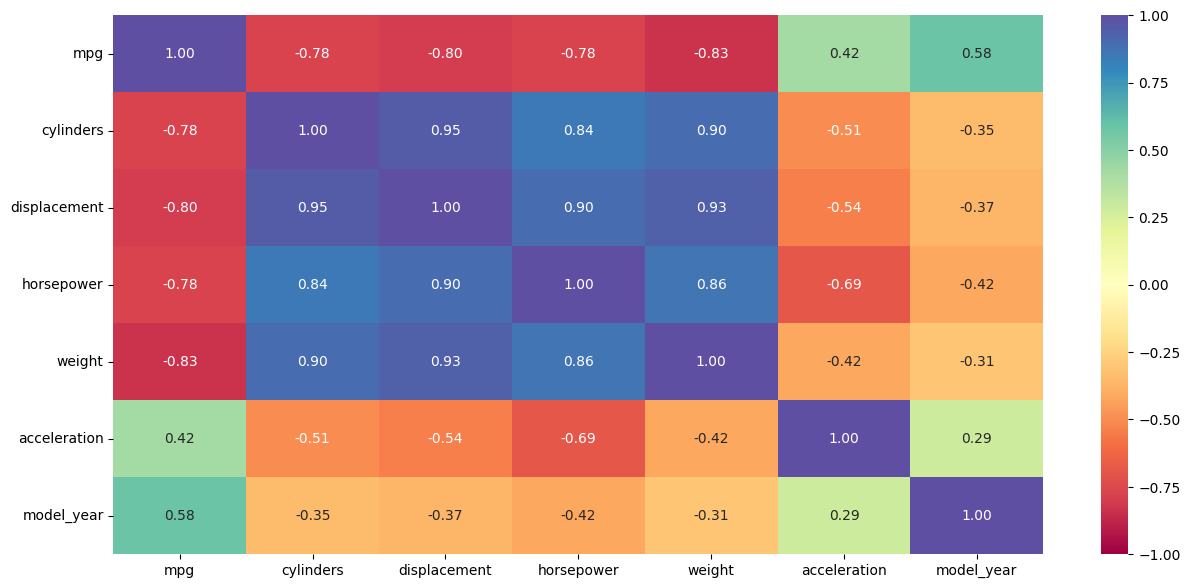

In [15]:
corr_cols=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']
plt.figure(figsize=(15, 7))
sns.heatmap(
   data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()
# we can see that # of cylinders, displacement, horsepower, and weight all have
# high correlation with fuel efficiency
# additionally, horsepower and # of cylinders have high correlation, validating our earlier horsepower data substitution

In [16]:
data.drop(labels = ["mpg", "car_name", "origin_2", "origin_3"], axis = 1)
# training features, we drop car name (nonnumeric, noncategorical field) and origin (vague and difficult to quantify for cars outsid)

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels = ["mpg", "car_name", "origin_2", "origin_3"], axis = 1), data.iloc[:,0], test_size=0.3, random_state=3)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import r2_score

In [20]:
# Check the accuracy on the test data (more relevant since we are trying to predict fuel efficiency for new cars)
accuracy_test=r2_score(y_test, lr.predict(X_test))
accuracy_test

0.8011547999657552

In [21]:
lr.score(X_test, y_test) # .score() uses the r2 scoring metric for linear regression, so we obtain the same result)

0.8011547999657552

In [22]:
# Check accuracy on the training data
accuracy_train=r2_score(y_train, lr.predict(X_train))
accuracy_train

0.8050896798118596

In [23]:
lr.score(X_train, y_train)

0.8050896798118596